In [151]:
import pandas as pd
import numpy as np

In [152]:
data = pd.read_csv("C:/Users/paudel/Documents/Simplilearn projects/Assignment/Walmart_Store_sales.csv")

In [153]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [155]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [156]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [157]:
#Which store has maximum sales



In [158]:
weekly_sales_sum = data["Weekly_Sales"].max()
store_max = data[(data["Weekly_Sales"] == weekly_sales_sum)]
store_max

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [ ]:
# The results shows that store 14 has the maximum sale individually

In [ ]:
#Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation



In [166]:
weekly_sales_sum = pd.DataFrame(data.groupby("Store")["Weekly_Sales"].sum())
#weekly_sales_store_max = weekly_sales_sum.iloc[weekly_sales_sum.max()]  
overall_store_max = weekly_sales_sum[(weekly_sales_sum.iloc[:, :1] == weekly_sales_sum.max())]


In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weekly_Sales')

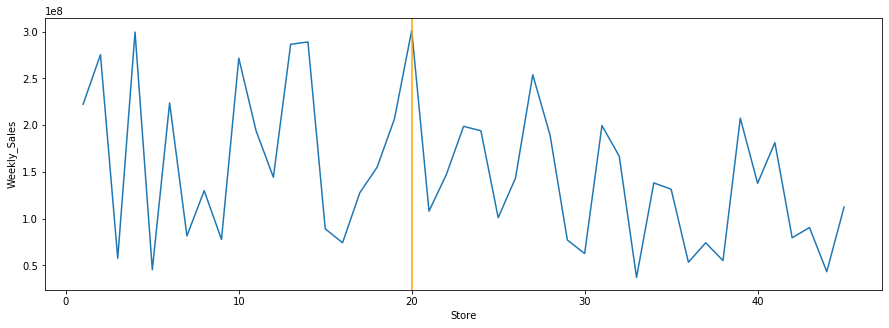

In [168]:
plt.figure(figsize=(15,5))
plt.plot(weekly_sales_sum, label="Weekly_Sales")
plt.axvline(20, color="orange")
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")

In [ ]:
#This graph shows store 20 has oveall highest weekly_sales

In [86]:
#Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [169]:
data["std"] = (data.groupby("Store")["Weekly_Sales"].std())
data.loc[data["std"] == data["std"].max()]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,std
14,1,14-05-2010,1494251.5,0,74.78,2.854,210.337426,7.808,317569.949476


In [ ]:
# This shows store 14 has the higest standard deviation

In [170]:
data["mean"] = (data.groupby("Store")["Weekly_Sales"].mean())
data.loc[data["mean"] == data["mean"].max()]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,std,mean
20,1,25-06-2010,1422711.6,0,84.34,2.653,211.338653,7.808,275900.562742,2.107677e+06


In [171]:
data["mean"]

0                NaN
1       1.555264e+06
2       1.925751e+06
3       4.027044e+05
4       2.094713e+06
            ...     
6430             NaN
6431             NaN
6432             NaN
6433             NaN
6434             NaN
Name: mean, Length: 6435, dtype: float64

In [195]:

data_group_mean_std = pd.DataFrame(data.groupby("Store").agg({"Weekly_Sales": ['mean', 'std']}))
data_group_mean_std.reset_index()
data_group_mean_std['CoV'] =(data_group_mean_std[('Weekly_Sales','std')]/data_group_mean_std[('Weekly_Sales','mean')]) *100

data_group_mean_std.loc[data_group_mean_std[('Weekly_Sales','std')]==data_group_mean_std[('Weekly_Sales','std')].max()]

#data_group_std = data1.groupby("Store").std()
#data_cov = data_group_std/data_group_mean
#data1 = pd.concat([data_group_mean, data_group_std], axis=1)
#data1["cov"] = data_group_std/data_group_mean

Weekly_Sales                       CoV
               mean            std           
Store                                        
14     2.020978e+06  317569.949476  15.713674

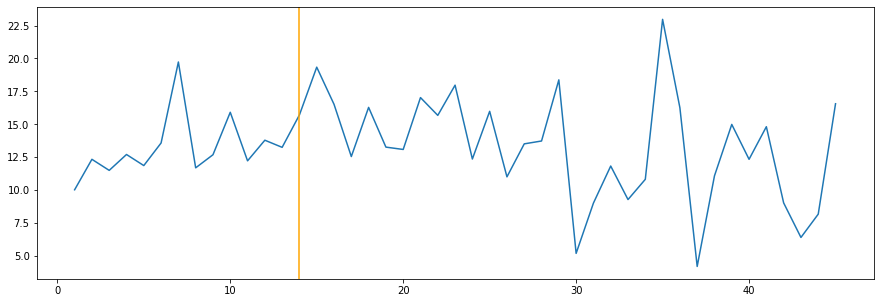

In [211]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data_group_mean_std["CoV"])
plt.axvline(14, color="orange")